> Title: *An Analysis of Pulgarcito Mini Market* <br>
> Author: *Gabriel Lopez* <br>
> Date: *INFO 3440 Winter Quarter 2021* <br>

# Table of Contents<a id="Top"></a>

1. [Problem Statement](#1)<br>
2. [Data](#2) <br>
    2.1 [Data Source](#2.1)<br>
    2.2 [Another Section](#2.2)<br>
3. [Model Definition](#3)<br>
4. [Model Solution](#4)<br>
5. [Sensitivity Analysis](#5)<br>
6. [Conclusions](#6)<br>
    6.1 [Tactical Information](#6.1)<br>
    6.2 [Strategic Information](#6.2)<br>
7. [Model Limitations, Future Improvements and Challenges](#7) <br>

# 1. Problem Statement<a id=1></a>

The Pulgarcito is a local Latin American mini market located in Santa Fe, NM. The owner sells a variety of products but wants to focus on some of his more popular products to maximize profits. There are fixed shipping costs associated with each product if it is to be chosen. In addition, each product has a Revenue that it produces per box, and an associated cost per box. The overall problem will be measured in boxes of each product, since the owner purchases products in bulk. Lastly, there are certain logical constraints that must be followed as well, such as the minimum requirement of at least one frozen product.

##### [Back to Top](#Top)

# 2. Data<a id=2></a>

In [6]:
#import necessary python packages
import pandas as pd #ver 1.1.3
import pyomo.environ as pe #ver 5.7
import matplotlib.pyplot as plt #ver 3.3.2
%matplotlib inline 

In [7]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## 2.1 Data Source<a id=2.1></a>

In [8]:
import os
os.getcwdb()

os.chdir('C:\\Users\\Gabriel Lopez\\OneDrive - University of Denver\\Documents\\University of Denver Work\\Winter Quarter 2021\\INFO 3440')

In [9]:
# Read in raw data from excel file. 
raw_data = pd.read_excel('Python Project Data.xlsx', sheet_name='Data')
raw_data

,Measured in Boxes,P1,P2,P3,P4,P5,P6
0,NaN,Plantain Leaves,Frozem Yuca,Pacaya,Frozen Pupusas,Nance,Masa De Tamales
1,Shipping Cost,150,180,190,145,175,165
2,Sell Price,80,95,100,85,75,115
3,Cost Per Unit,45,65,80,55,60,90
4,Max Expense For Each Product,1000,900,1000,850,750,1100
5,Min Unit Requirements,50,55,60,55,70,65


## 2.2 Create Dataframe for Revenue, Shipping Cost, and Price/Unit<a id=2.2></a>

In [10]:
DV_indexes = ['Plantain Leaves','Frozen Yuca','Pacaya','Frozen Pupusas','Nance','Masa De Tamales']
coef = raw_data.iloc[[1,2,3],[1,2,3,4,5,6]]
coef.index=['Shipping Cost','Revenue','Cost Per Unit']
coef.columns=DV_indexes
coef

,Plantain Leaves,Frozen Yuca,Pacaya,Frozen Pupusas,Nance,Masa De Tamales
Shipping Cost,150,180,190,145,175,165
Revenue,80,95,100,85,75,115
Cost Per Unit,45,65,80,55,60,90


In [11]:
##Create max requirements dataframe
max1 = raw_data.iloc[[4,5],[1,2,3,4,5,6]]
max1.index=['Max Expense','Max Capacity']
max1.columns=DV_indexes
max1

,Plantain Leaves,Frozen Yuca,Pacaya,Frozen Pupusas,Nance,Masa De Tamales
Max Expense,1000,900,1000,850,750,1100
Max Capacity,50,55,60,55,70,65


##### [Back to Top](#Top)

# 3. Model Definition<a id=3><a>

In [12]:
model = pe.ConcreteModel()

In [13]:
#define the decision variables. X- Variables are the associated quantities of each product, and the y-variables are the y/n binary decisions. 
model.x = pe.Var(DV_indexes, domain=pe.NonNegativeIntegers)
model.y = pe.Var(DV_indexes, domain=pe.Binary)
model.x.pprint()
model.y.pprint()

x : Size=6, Index=x_index
    Key             : Lower : Value : Upper : Fixed : Stale : Domain
     Frozen Pupusas :     0 :  None :  None : False :  True : NonNegativeIntegers
        Frozen Yuca :     0 :  None :  None : False :  True : NonNegativeIntegers
    Masa De Tamales :     0 :  None :  None : False :  True : NonNegativeIntegers
              Nance :     0 :  None :  None : False :  True : NonNegativeIntegers
             Pacaya :     0 :  None :  None : False :  True : NonNegativeIntegers
    Plantain Leaves :     0 :  None :  None : False :  True : NonNegativeIntegers
y : Size=6, Index=y_index
    Key             : Lower : Value : Upper : Fixed : Stale : Domain
     Frozen Pupusas :     0 :  None :     1 : False :  True : Binary
        Frozen Yuca :     0 :  None :     1 : False :  True : Binary
    Masa De Tamales :     0 :  None :     1 : False :  True : Binary
              Nance :     0 :  None :     1 : False :  True : Binary
             Pacaya :     0 :  None :     

##### [Back to Top](#Top)

# 4. Model Solution<a id=4></a>

In [14]:
#maximize profit = revenue - shipping cost - variable cost(cost/unit)
model.obj = pe.Objective(expr=sum(coef.loc['Revenue', c]*model.x[c]
                                   for c in DV_indexes)
                         - sum(coef.loc['Cost Per Unit',c]*model.x[c] 
                                for c in DV_indexes)
                        - sum(coef.loc['Shipping Cost',c] *model.y[c]
                                 for c in DV_indexes),
                         sense=pe.maximize)
model.obj.pprint()

obj : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : maximize : 80*x[Plantain Leaves] + 95*x[Frozen Yuca] + 100*x[Pacaya] + 85*x[Frozen Pupusas] + 75*x[Nance] + 115*x[Masa De Tamales] - (45*x[Plantain Leaves] + 65*x[Frozen Yuca] + 80*x[Pacaya] + 55*x[Frozen Pupusas] + 60*x[Nance] + 90*x[Masa De Tamales]) - (150*y[Plantain Leaves] + 180*y[Frozen Yuca] + 190*y[Pacaya] + 145*y[Frozen Pupusas] + 175*y[Nance] + 165*y[Masa De Tamales])


In [15]:
#Max Expense for Each Product
model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Plantain Leaves']*model.x['Plantain Leaves']
                                    <= max1.loc['Max Expense','Plantain Leaves'])
model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Frozen Yuca']*model.x['Frozen Yuca']
                                    <= max1.loc['Max Expense','Frozen Yuca'])
model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Pacaya']*model.x['Pacaya']
                                    <= max1.loc['Max Expense','Pacaya'])
model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Frozen Pupusas']*model.x['Frozen Pupusas']
                                    <= max1.loc['Max Expense','Frozen Pupusas'])
model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Nance']*model.x['Nance']
                                    <= max1.loc['Max Expense','Nance'])
model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Masa De Tamales']*model.x['Masa De Tamales']
                                    <= max1.loc['Max Expense','Masa De Tamales'])
    
#Linking Maximum Capacity constraint
model.LinkPL = pe.Constraint(expr=model.x['Plantain Leaves'] <= max1.loc['Max Capacity','Plantain Leaves'] * model.y['Plantain Leaves'])
model.LinkFY = pe.Constraint(expr=model.x['Frozen Yuca'] <= max1.loc['Max Capacity','Frozen Yuca'] * model.y['Frozen Yuca'])
model.LinkPA = pe.Constraint(expr=model.x['Pacaya'] <= max1.loc['Max Capacity','Pacaya'] * model.y['Pacaya'])
model.LinkFP = pe.Constraint(expr=model.x['Frozen Pupusas'] <= max1.loc['Max Capacity','Frozen Pupusas'] * model.y['Frozen Pupusas'])
model.LinkNE = pe.Constraint(expr=model.x['Nance'] <= max1.loc['Max Capacity','Nance'] * model.y['Nance'])
model.LinkMT = pe.Constraint(expr=model.x['Masa De Tamales'] <= max1.loc['Max Capacity','Masa De Tamales'] * model.y['Masa De Tamales'])

#Logical Constraints
#Requires 1 Frozen Product: P2 or P4 -> P2 + P4 >=1
model.cons_FrozenP2P4 = pe.Constraint(expr=model.y['Frozen Yuca']+model.y['Frozen Pupusas'] <= 1)
#P3 and P5 mutually exclusive -> P3 + P5 <=1
model.cons_MEP3P5 = pe.Constraint(expr=model.y['Pacaya']+model.y['Nance'] <= 1)
#P1 is contingent on P6 -> P6-P1 >=0
model.cons_P1contonP6 = pe.Constraint(expr=model.y['Masa De Tamales']-model.y['Plantain Leaves'] >= 0)


model.pprint() #prints all objects (obj function, constraints, etc.) defined in the model

    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (ty

### Model Solution

In [16]:
opt = pe.SolverFactory('glpk')
#opt.solve(model,tee=True) 
success=opt.solve(model)
print(success.solver.status,success.solver.termination_condition)

ok optimal


In [17]:
#output objective function
obj_val = model.obj.expr()
printmd(f'optimal objective value maximum profit = ${obj_val:.2f}')

optimal objective value maximum profit = $4175.00

In [18]:
#create dataframe for decision variables
DV_solution1 = pd.DataFrame()
for DV in model.component_objects(pe.Var):
    for c in DV:
        DV_solution1.loc[DV.name,c] = DV[c].value
DV_solution1

,Plantain Leaves,Frozen Yuca,Pacaya,Frozen Pupusas,Nance,Masa De Tamales
x,50.0,0.0,60.0,55.0,0.0,9.0
y,1.0,0.0,1.0,1.0,0.0,1.0


##### [Back to Top](#Top)

# 5. Sensitivity Analysis<a id=5></a>

In [19]:
#create a function to run sensitivity analysis 
def run_model():
    model = pe.ConcreteModel()
    # Define Decision Variables
    model.x = pe.Var(DV_indexes, domain=pe.NonNegativeIntegers)
    model.y = pe.Var(DV_indexes, domain=pe.Binary)
    #maximize profit = revenue - fixed cost - variable cost
    model.obj = pe.Objective(expr=sum(coef.loc['Revenue', c]*model.x[c]
                                   for c in DV_indexes)
                         - sum(coef.loc['Cost Per Unit',c]*model.x[c] 
                                for c in DV_indexes)
                        - sum(coef.loc['Shipping Cost',c] *model.y[c]
                                 for c in DV_indexes),
                         sense=pe.maximize)
    #Max Expenses
    model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Plantain Leaves']*model.x['Plantain Leaves']
                                    <= max.loc['Max Expense','Plantain Leaves'])
    model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Frozen Yuca']*model.x['Frozen Yuca']
                                    <= max.loc['Max Expense','Frozen Yuca'])
    model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Pacaya']*model.x['Pacaya']
                                    <= max.loc['Max Expense','Pacaya'])
    model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Frozen Pupusas']*model.x['Frozen Pupusas']
                                    <= max.loc['Max Expense','Frozen Pupusas'])
    model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Nance']*model.x['Nance']
                                    <= max.loc['Max Expense','Nance'])
    model.max_expense = pe.Constraint(expr=coef.loc['Revenue','Masa De Tamales']*model.x['Masa De Tamales']
                                    <= max.loc['Max Expense','Masa De Tamales'])

    #Linking Fixed Maximum Capacity Requirements
    model.LinkPL = pe.Constraint(expr=model.x['Plantain Leaves'] <= max.loc['Max Capacity','Plantain Leaves'] * model.y['Plantain Leaves'])
    model.LinkFY = pe.Constraint(expr=model.x['Frozen Yuca'] <= max.loc['Max Capacity','Frozen Yuca'] * model.y['Frozen Yuca'])
    model.LinkPA = pe.Constraint(expr=model.x['Pacaya'] <= max.loc['Max Capacity','Pacaya'] * model.y['Pacaya'])
    model.LinkFP = pe.Constraint(expr=model.x['Frozen Pupusas'] <= max.loc['Max Capacity','Frozen Pupusas'] * model.y['Frozen Pupusas'])
    model.LinkNE = pe.Constraint(expr=model.x['Nance'] <= max.loc['Max Capacity','Nance'] * model.y['Nance'])
    model.LinkMT = pe.Constraint(expr=model.x['Masa De Tamales'] <= max.loc['Max Capacity','Masa De Tamales'] * model.y['Masa De Tamales'])
    
    #Logical Constraints
    #Requires 1 Frozen Product: P2 or P4 -> P2 + P4 >=1
    model.cons_FrozenP2P4 = pe.Constraint(expr=model.y['Frozen Yuca']+model.y['Frozen Pupusas'] <= 1)
    #P3 and P5 mutually exclusive -> P3 + P5 <=1
    model.cons_MEP3P5 = pe.Constraint(expr=model.y['Pacaya']+model.y['Nance'] <= 1)
    #P1 is contingent on P6 -> P6-P1 >=0
    model.cons_P1contonP6 = pe.Constraint(expr=model.y['Masa De Tamales']-model.y['Plantain Leaves'] >= 0)

    opt = pe.SolverFactory('glpk')
    #opt.solve(model,tee=True) 
    success=opt.solve(model)
    return model

In [20]:
max_orig = max1.copy()
max_orig

,Plantain Leaves,Frozen Yuca,Pacaya,Frozen Pupusas,Nance,Masa De Tamales
Max Expense,1000,900,1000,850,750,1100
Max Capacity,50,55,60,55,70,65


### Dataframe to hold results

In [21]:
results = pd.DataFrame()

## Run the Problem with Different Max Product Requirements 

In [22]:
# increase max. capacity by 5, 10, and 15 units
for w in [5, 10, 15]:
    max = max_orig.copy() #reset to original
    max.loc['Max Capacity'] = max.loc['Max Capacity'] + w
    model = run_model()
    #capture DV and optimal profit
    DV_solution = pd.DataFrame()
    for c in DV_indexes:
        DV_solution.loc[f'max capacity{w}',c] = model.x[c].value
    results = results.append(DV_solution)
    results.loc[f'max capacity{w}','opt profit'] = model.obj.expr()

results

    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (ty

,Plantain Leaves,Frozen Yuca,Pacaya,Frozen Pupusas,Nance,Masa De Tamales,opt profit
max capacity5,55.0,0.0,65.0,60.0,0.0,9.0,4600.0
max capacity10,60.0,0.0,70.0,65.0,0.0,9.0,5025.0
max capacity15,65.0,0.0,75.0,70.0,0.0,9.0,5450.0


##### [Back to Top](#Top)

## Run the problem with varying max expenses

In [23]:
#increase max. expense by 150, 300, 450, and 600 dollars. 
for h in [150, 300, 450, 600]:
    max = max_orig.copy() #reset to original
    max.loc['Max Expense'] = max.loc['Max Expense'] + h
    model = run_model()
    #capture DV and optimal profit
    DV_solution = pd.DataFrame()
    for c in DV_indexes:
        DV_solution.loc[f'max expense{h}',c] = model.x[c].value
    results = results.append(DV_solution)
    results.loc[f'max expense{h}','opt profit'] = model.obj.expr()

results

    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (ty

,Plantain Leaves,Frozen Yuca,Pacaya,Frozen Pupusas,Nance,Masa De Tamales,opt profit
max capacity5,55.0,0.0,65.0,60.0,0.0,9.0,4600.0
max capacity10,60.0,0.0,70.0,65.0,0.0,9.0,5025.0
max capacity15,65.0,0.0,75.0,70.0,0.0,9.0,5450.0
max expense150,50.0,0.0,60.0,55.0,0.0,10.0,4200.0
max expense300,50.0,0.0,60.0,55.0,0.0,12.0,4250.0
max expense450,50.0,0.0,60.0,55.0,0.0,13.0,4275.0
max expense600,50.0,0.0,60.0,55.0,0.0,14.0,4300.0


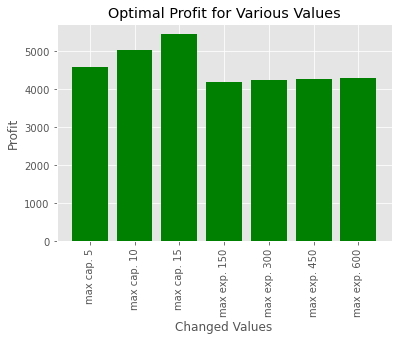

In [24]:
#create a bar plot displaying all the optimal profits for each change in constraints. 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['max cap. 5', 'max cap. 10', 'max cap. 15', 'max exp. 150', 'max exp. 300', 'max exp. 450', 'max exp. 600']

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, results['opt profit'], color='green')
plt.xlabel("Changed Values")
plt.ylabel("Profit")
plt.title("Optimal Profit for Various Values")

plt.xticks(x_pos, x)
plt.xticks(rotation = 90)

plt.show()

# 6. Conclusions<a id=6></a>

## 6.1 Tactical Information<a id=6.1></a>

All the solutions do not include Yuca or Nance, meaning that these products are not ideal overall. Perhaps finding a new (cheaper) supplier and a less expensive shipping method could change the optimal decisions and include these products in the optimal solution for the future. In addition, finding substitutions for these products could prove beneficial since right now it does not make sense financially to keep them.  The plantain leaves are a more vital product to the product mix and should be prioritized as they are a large portion of the decision variables. Overall, the model suggests stocking up on Plantain Leaves, Pacaya, Frozen Pupusas, and Masa De Tamales.


## 6.2 Strategic Information<a id=6.2></a>

As mentioned, there are four products that should be prioritized in the store's inventory. However, increasing maximum capacity of products proves beneficial as Plantain Leaves, Yuca, and Frozen Pupusas are increased by increments of 5 which in turn increases profits by about 400 dollars each time. On the other hand, increasing expenses does not help as the three main products mentioned before stay constant. The only product that increases with the expense requirement is Masa De Tamales, but only by small increments. Consequently, profits do not increase as much, therefore not carrying as much benefit. Increasing maximum product capacity would be recommended.


##### [Back to Top](#Top)

# 7. Model Limitations, Future Improvements and Challenges<a id=7></a>

##### [Back to Top](#Top)

This model is clearly a scaled down representation of the store. The store itself carries numerous products and would need additional inputs for the model to be more beneficial. Perhaps, running separate models for different product categories could prove ideal, but it would be a task with a much larger scope. In addition, this model does not account for product popularity and customer demand of certain products. These variables would need to be incorporated to run a more efficient and accurate model. Adding "weights" to each product could be a potential solution for the future.
